In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils
from keras.models import model_from_json
import keras.backend as K

D:\Users\dmunagal\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Rice Prediction

24/24 [==============================] - 0s 1ms/step
Populating the interactive namespace from numpy and matplotlib


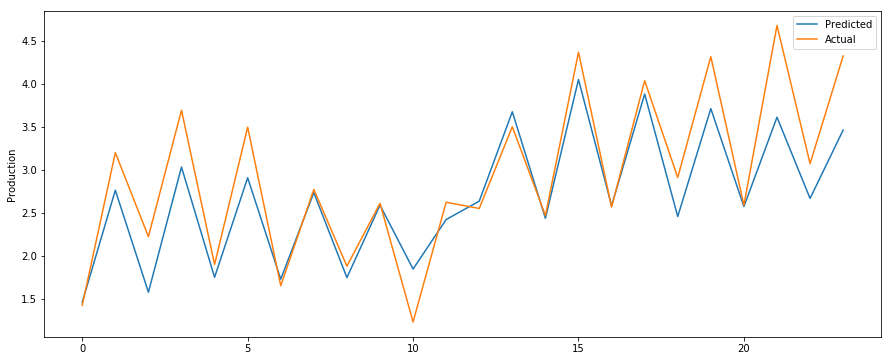

Mean Squared Error for Rice :  0.1940099149942398


In [3]:
#Loading model and weights from json file and h5 file respectively
json_file = open('Prediction_Models/AP_Rice_Prediction.json', 'r')
json_model = json_file.read()
json_file.close()

loaded_model = model_from_json(json_model)
loaded_model.load_weights('Prediction_Models/AP_Rice_Prediction_ModelWeights.h5')
#Compiling the loaded model
loaded_model.compile(optimizer='adam', loss='mse')

#Loading crop data from csv file
APProd = pd.read_csv('AndhraPradeshProduction.csv')
APRiceProd = APProd.where(APProd['Crop'] == 'Rice')
APRiceProd = APRiceProd.dropna()
APRiceProd = APRiceProd.drop(columns=['State_Name', 'District_Name', 'Crop', 'Area', 'Production'])
APRiceProd = pd.get_dummies(APRiceProd, columns=['Season'])
APRiceProd['Crop_Year'] = pd.to_numeric(APRiceProd['Crop_Year'], downcast='integer')

X = APRiceProd.drop('Tonnes/Acres', axis = 1)
Y = APRiceProd['Tonnes/Acres']

loss = loaded_model.evaluate(X.tail(24), Y.tail(24))
prediction = loaded_model.predict(X.tail(24))


#Plotting the values
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

plt.plot(prediction, label='Predicted')
plt.plot(Y.tail(24).values, label='Actual')
plt.ylabel('Production')

plt.legend()
plt.show()

#loss in terms of mse
print("Mean Squared Error for Rice : ", loss)

### Jowar Prediction

50/50 [==============================] - 0s 800us/step
Populating the interactive namespace from numpy and matplotlib


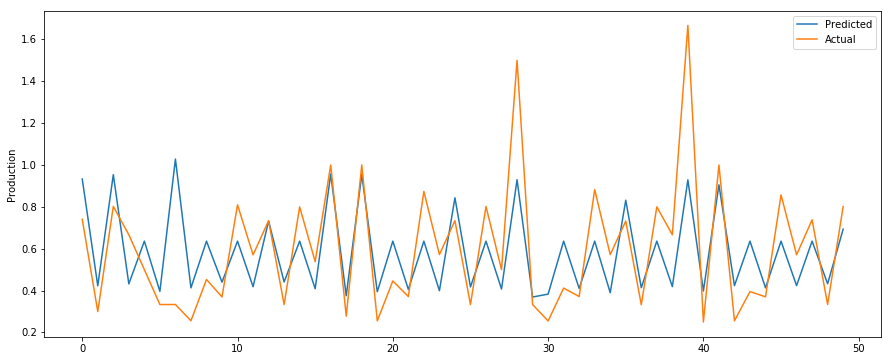

Mean Squared Error for Jowar :  0.04753964796662331


In [6]:
#Loading model and weights from json file and h5 file respectively
jowar_json_file = open('Prediction_Models/AP_Jowar_Prediction.json', 'r')
json_model = jowar_json_file.read()
jowar_json_file.close()

jowar_loaded_model = model_from_json(json_model)
jowar_loaded_model.load_weights('Prediction_Models/AP_Jowar_Prediciton_ModelWeights.h5')
#Compiling the loaded model
jowar_loaded_model.compile(optimizer='adam', loss='mse')

#Loading crop data from csv file
APProd = pd.read_csv('AndhraPradeshProduction.csv')
APProd = APProd.where(APProd['Crop'] == 'Jowar')
APProd = APProd.dropna()
APProd = APProd.drop(columns=['State_Name', 'District_Name', 'Crop', 'Area', 'Production'])
APProd = pd.get_dummies(APProd, columns=['Season'])
APProd['Crop_Year'] = pd.to_numeric(APProd['Crop_Year'], downcast='integer')

X = APProd.drop('Tonnes/Acres', axis = 1)
Y = APProd['Tonnes/Acres']

loss = jowar_loaded_model.evaluate(X.tail(50), Y.tail(50))
prediction = jowar_loaded_model.predict(X.tail(50))

#Plotting the values
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

plt.plot(prediction, label='Predicted')
plt.plot(Y.tail(50).values, label='Actual')
plt.ylabel('Production')

plt.legend()
plt.show()

#loss in terms of mse
print("Mean Squared Error for Jowar : ", loss)

In [ ]:
import keras
import sklearn
import numpy as np
import pandas as pd
from keras import optimizers
from keras.layers import Dense
from keras.models import Sequential

class PredicitonModelTemplateAndhraPradesh():
    def __init__(self, cropName):
        self.cropName = cropName
        self.prod = pd.DataFrame()
        self.reqCropProd = pd.DataFrame()
        self.model = Sequential()

    def _preparingCropData(self):
        self.prod = pd.read_csv('AndhraPradeshProduction.csv')
        self.reqCropProd = self.prod.where(self.prod['Crop'] == self.cropName)
        self.reqCropProd = self.reqCropProd.dropna()
        self.reqCropProd = self.reqCropProd.drop(columns=['State_Name', 'District_Name', 'Crop', 'Area', 'Production'])
        self.reqCropProd = pd.get_dummies(self.reqCropProd, columns=['Season'])
        self.reqCropProd['Crop_Year'] = pd.to_numeric(self.reqCropProd['Crop_Year'], downcast='integer')

    def createModel(self):
        self._preparingCropData()
        #Training Data
        X = self.reqCropProd.drop('Tonnes/Acres', axis = 1)
        Y = self.reqCropProd['Tonnes/Acres']

        #Creating Model
        self.model.add(Dense(30, input_shape=(13,), kernel_initializer='normal', activation='relu', name='InputLayer'))
        self.model.add(Dense(13, kernel_initializer='normal', activation='relu', name='HiddenLayer'))
        self.model.add(Dense(1, kernel_initializer='normal', activation='linear', name='OutputLayer'))

        #Compiling Model
        self.model.compile(loss='mse', optimizer='adam')

        #Training Model
        self.model.fit(X, Y, epochs=2500, batch_size=5, verbose=0)
        
        #Saving Model
        model_json = self.model.to_json()

        with open("Prediction_Models/AP_" + self.cropName + "_Prediction.json", "w") as json_file:
            json_file.write(model_json)

        self.model.save_weights("Prediction_Models/AP_" + self.cropName + "_Prediction_ModelWeights.h5")
        print("Saved model to disk.")


### Maize(Corn) Prediction

50/50 [==============================] - 0s 1ms/step
Populating the interactive namespace from numpy and matplotlib


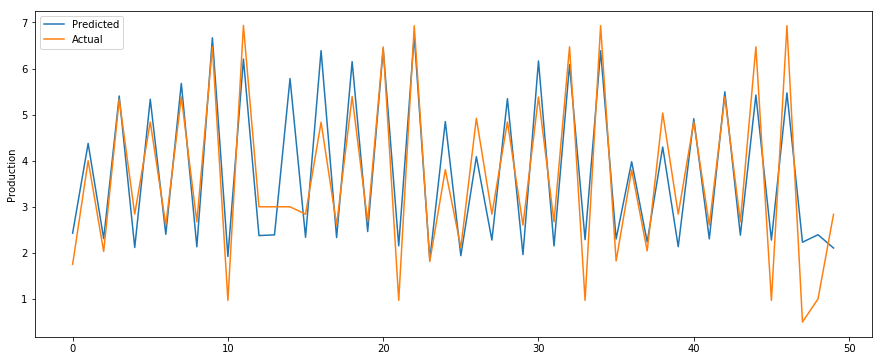

Mean Squared Error for Maize :  0.6893956565856934


In [8]:
#Loading model and weights from json file and h5 file respectively
Maize_json_file = open('Prediction_Models/AP_Maize_Prediction.json', 'r')
Maize_json_model = Maize_json_file.read()
Maize_json_file.close()

Maize_loaded_model = model_from_json(Maize_json_model)
Maize_loaded_model.load_weights('Prediction_Models/AP_Maize_Prediciton_ModelWeights.h5')
#Compiling the loaded model
Maize_loaded_model.compile(optimizer='adam', loss='mse')

#Loading crop data from csv file
APProd = pd.read_csv('AndhraPradeshProduction.csv')
APProd = APProd.where(APProd['Crop'] == 'Maize')
APProd = APProd.dropna()
APProd = APProd.drop(columns=['State_Name', 'District_Name', 'Crop', 'Area', 'Production'])
APProd = pd.get_dummies(APProd, columns=['Season'])
APProd['Crop_Year'] = pd.to_numeric(APProd['Crop_Year'], downcast='integer')

X = APProd.drop('Tonnes/Acres', axis = 1)
Y = APProd['Tonnes/Acres']

loss = Maize_loaded_model.evaluate(X.head(50), Y.head(50))
prediction = Maize_loaded_model.predict(X.head(50))

#Plotting the values
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

plt.plot(prediction, label='Predicted')
plt.plot(Y.head(50).values, label='Actual')
plt.ylabel('Production')

plt.legend()
plt.show()

#loss in terms of mse
print("Mean Squared Error for Maize : ", loss)

In [12]:
!python ProfitableCropsPrediction.py Chittoor Kharif 2001

Chittoor Kharif 2001
{'Rice': [2.641994315490289, 2.6405818462371826], 'Maize': [2.6050420168067228, 2.46236515045166], 'Jowar': [0.7601237345331834, 0.5758652687072754]}
Rice : Can continue the crop in same area

Maize : Can see profit, if production area is increased

Jowar : Can see profit, if production area is increased



2018-09-29 17:12:17.497736: I T:\src\github\tensorflow\tensorflow\core\platform\cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
2018-09-29 17:12:17.784757: I T:\src\github\tensorflow\tensorflow\core\common_runtime\gpu\gpu_device.cc:1405] Found device 0 with properties: 
name: GeForce GTX 1060 major: 6 minor: 1 memoryClockRate(GHz): 1.6705
pciBusID: 0000:01:00.0
totalMemory: 6.00GiB freeMemory: 4.97GiB
2018-09-29 17:12:17.785279: I T:\src\github\tensorflow\tensorflow\core\common_runtime\gpu\gpu_device.cc:1484] Adding visible gpu devices: 0
2018-09-29 17:12:18.979390: I T:\src\github\tensorflow\tensorflow\core\common_runtime\gpu\gpu_device.cc:965] Device interconnect StreamExecutor with strength 1 edge matrix:
2018-09-29 17:12:18.979717: I T:\src\github\tensorflow\tensorflow\core\common_runtime\gpu\gpu_device.cc:971]      0 
2018-09-29 17:12:18.979930: I T:\src\github\tensorflow\tensorflow\core\common_runtime\gpu\gpu_devi

In [3]:
!python ProfitableCropsPrediction.py Kurnool Kharif 2000

Kurnool Kharif 2000
{'Rice': [2.761281234688878, 2.6486153602600098], 'Maize': [2.8415545590433484, 2.323026657104492], 'Jowar': [0.630960882329604, 0.9920402765274048]}
Rice : Can see profit, if production area is increased

Maize : Can see profit, if production area is increased

Jowar : Production will be high, it will be better to cultivate other crops by reducing some cultivation area of this crop



2018-09-29 17:08:05.567772: I T:\src\github\tensorflow\tensorflow\core\platform\cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
2018-09-29 17:08:05.842843: I T:\src\github\tensorflow\tensorflow\core\common_runtime\gpu\gpu_device.cc:1405] Found device 0 with properties: 
name: GeForce GTX 1060 major: 6 minor: 1 memoryClockRate(GHz): 1.6705
pciBusID: 0000:01:00.0
totalMemory: 6.00GiB freeMemory: 4.97GiB
2018-09-29 17:08:05.843225: I T:\src\github\tensorflow\tensorflow\core\common_runtime\gpu\gpu_device.cc:1484] Adding visible gpu devices: 0
2018-09-29 17:08:07.044850: I T:\src\github\tensorflow\tensorflow\core\common_runtime\gpu\gpu_device.cc:965] Device interconnect StreamExecutor with strength 1 edge matrix:
2018-09-29 17:08:07.045240: I T:\src\github\tensorflow\tensorflow\core\common_runtime\gpu\gpu_device.cc:971]      0 
2018-09-29 17:08:07.045474: I T:\src\github\tensorflow\tensorflow\core\common_runtime\gpu\gpu_devi